<a href="https://colab.research.google.com/github/M-Traiki/CNN_Project_Week6/blob/main/Script2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = tf.image.resize(X_train, (96, 96))
X_test  = tf.image.resize(X_test, (96, 96))


In [14]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(96,96,3))
base_model.trainable = False

In [15]:
model = models.Sequential([
    layers.InputLayer((96,96,3)),
    base_model,
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [18]:
history_fine = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.7406 - loss: 0.8027 - val_accuracy: 0.8558 - val_loss: 0.4270
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8699 - loss: 0.4108 - val_accuracy: 0.8681 - val_loss: 0.3964
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8988 - loss: 0.3109 - val_accuracy: 0.8720 - val_loss: 0.4065
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9148 - loss: 0.2581 - val_accuracy: 0.8740 - val_loss: 0.4285
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9301 - loss: 0.2078 - val_accuracy: 0.8776 - val_loss: 0.4199
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9415 - loss: 0.1780 - val_accuracy: 0.8720 - val_loss: 0.4577
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9487 - loss: 0.1568 - val_accuracy: 0.8772 - val_loss: 0.4739
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9547 - loss: 0

In [19]:
model.save("Efficeint_Net_Model.keras")

In [20]:
model_2 = models.Sequential([
    layers.InputLayer((96,96,3)),
    base_model,
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

In [23]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [24]:
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model_2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.7568 - loss: 0.7644 - val_accuracy: 0.8586 - val_loss: 0.4224
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8636 - loss: 0.4280 - val_accuracy: 0.8676 - val_loss: 0.4150
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8948 - loss: 0.3423 - val_accuracy: 0.8682 - val_loss: 0.4315
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9108 - loss: 0.2873 - val_accuracy: 0.8674 - val_loss: 0.4839
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9230 - loss: 0.2446 - val_accuracy: 0.8739 - val_loss: 0.4889
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9331 - loss: 0.2171 - val_accuracy: 0.8758 - val_loss: 0.5450
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9396 - loss: 0.1987 - val_accuracy: 0.8672 - val_loss: 0.5426
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9439 - loss: 0

In [26]:
model_2.save("second_transfer_model_RMSprop.keras")

In [27]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8625 - loss: 0.4202
Test Accuracy: 0.8615
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

    airplane       0.84      0.88      0.86      1000
  automobile       0.88      0.94      0.91      1000
        bird       0.86      0.84      0.85      1000
         cat       0.79      0.70      0.74      1000
        deer       0.89      0.79      0.84      1000
         dog       0.81      0.83      0.82      1000
        frog       0.83      0.91      0.87      1000
       horse       0.87      0.93      0.90      1000
        ship       0.90      0.93      0.91      1000
       truck       0.94      0.88      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



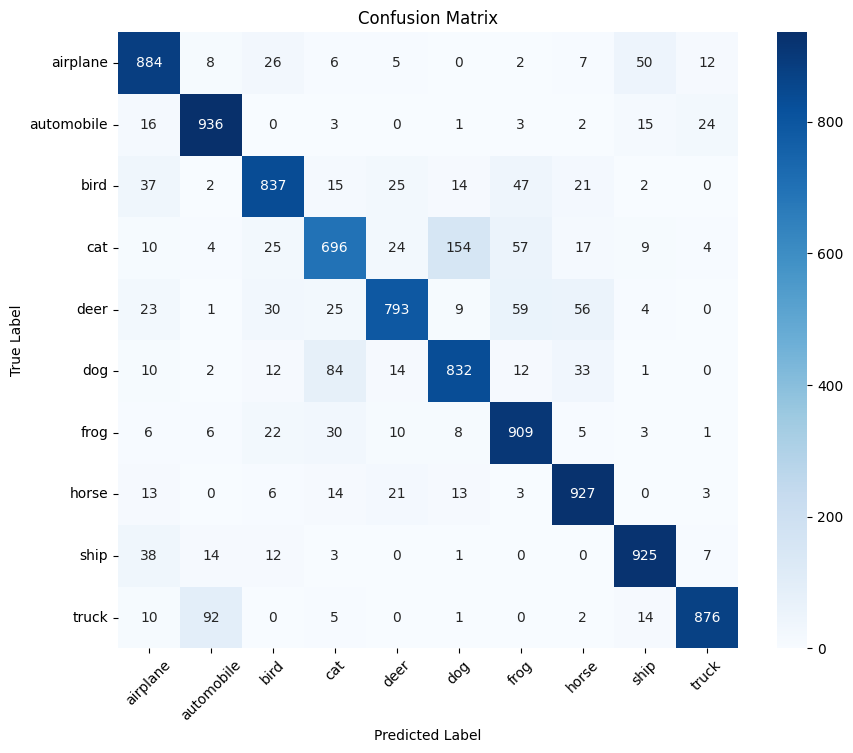

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report
y_true = np.argmax(y_test, axis=1)


report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [34]:
base_model.trainable = True
for layer in base_model.layers[:-50]:  # keep early layers frozen
    layer.trainable = False

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 47ms/step - accuracy: 0.7927 - loss: 0.7309 - val_accuracy: 0.8306 - val_loss: 0.5460
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8430 - loss: 0.4926 - val_accuracy: 0.8464 - val_loss: 0.4877
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8614 - loss: 0.4250 - val_accuracy: 0.8525 - val_loss: 0.4580
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8726 - loss: 0.3930 - val_accuracy: 0.8589 - val_loss: 0.4360
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8854 - loss: 0.3536 - val_accuracy: 0.8633 - val_loss: 0.4221
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8934 - loss: 0.3230 - val_accuracy: 0.8687 - val_loss: 0.4087
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9007 - loss: 0.3012 - val_accuracy: 0.8706 - val_loss: 0.4007
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9000 - loss: 0.2963 - 

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [36]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

optimizer_fine = tf.keras.optimizers.RMSprop(learning_rate=1e-4, rho=0.9)
model_2.compile(optimizer=optimizer_fine, loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model_2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stop])

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print("Fine-tuned test accuracy:", test_acc)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 46ms/step - accuracy: 0.8895 - loss: 0.3623 - val_accuracy: 0.8881 - val_loss: 0.3815
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9251 - loss: 0.2284 - val_accuracy: 0.8972 - val_loss: 0.3800
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9435 - loss: 0.1742 - val_accuracy: 0.8999 - val_loss: 0.4008
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9583 - loss: 0.1364 - val_accuracy: 0.8978 - val_loss: 0.4353
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9659 - loss: 0.1086 - val_accuracy: 0.9042 - val_loss: 0.4604
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9705 - loss: 0.0945 - val_accuracy: 0.9029 - val_loss: 0.4708
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9763 - loss: 0.0792 - val_accuracy: 0.9053 - val_loss: 0.5107
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9769 - loss: 0

In [38]:
model_2.save("Fine_Tuned_Eff_RMS_unfrozen.keras")